In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD

from helper_functions import fit, evaluate_model, scale_data, draw_epochs_losses

In [ ]:
print(os.listdir("../Data/Input"))

['Life Expectancy Data.csv', 'test.csv', 'train.csv']


# **1 &nbsp;&nbsp;&nbsp; Load Data**

In [ ]:
train_df = pd.read_csv("../Data/Input/Train/train.csv")
test_df = pd.read_csv("../Data/Input/Test/test.csv")

# **2 &nbsp;&nbsp;&nbsp; Standardize Data**

In [6]:
# Get the features and target
integer_features_train = train_df[["Country", "Income composition of resources"]]
integer_features_test = test_df[["Country", "Income composition of resources"]]

integer_target_train = train_df["Life expectancy "]
integer_target_test = test_df["Life expectancy "]

In [7]:
# Get the country's continent
def get_country_continent(country):
    continent_dict = {
        'Africa': ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi',
                   "Côte d'Ivoire","Cabo Verde","Cameroon","Central African Republic",
                   "Chad","Comoros","Congo","Democratic Republic of the Congo",
                   "Djibouti","Egypt","Equatorial Guinea","Eritrea","Ethiopia",
                   "Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Kenya",
                   "Lesotho","Liberia","Libya","Madagascar","Malawi","Mali",
                   "Mauritania","Mauritius","Morocco","Mozambique","Namibia",
                   "Niger","Nigeria","Rwanda","Sao Tome and Principe","Senegal",
                   "Seychelles","Sierra Leone","Somalia","South Africa","South Sudan",
                   "Sudan","Swaziland","Tanzania","Togo","Tunisia","Uganda",
                   "Zambia","Zimbabwe"],
        'Asia': ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan',
                 'Brunei Darussalam','Cambodia','China','Georgia','India','Indonesia',
                 'Iran (Islamic Republic of)','Iraq','Israel','Japan','Jordan',
                 'Kazakhstan','Kuwait','Kyrgyzstan',"Lao People's Democratic Republic",
                 'Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','Oman',
                 'Pakistan','Palau','Philippines','Qatar','Republic of Korea','Saudi Arabia',
                 'Singapore','Sri Lanka','Syrian Arab Republic','Tajikistan','Thailand',
                 'Timor-Leste','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan',
                 'Viet Nam','Yemen'],
        'Europe': ['Albania','Austria','Belarus','Belgium','Bosnia and Herzegovina',
                   'Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia',
                   'Finland','France','Germany','Greece','Hungary','Iceland','Ireland',
                   'Italy','Latvia','Lithuania','Luxembourg','Malta','Monaco','Montenegro',
                   'Netherlands','Norway','Poland','Portugal','Republic of Moldova',
                   'Romania','Russian Federation','San Marino','Slovakia','Slovenia',
                   'Spain','The former Yugoslav republic of Macedonia','United Kingdom of Great Britain and Northern Ireland'],
        'North America': ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada',
                          'Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador',
                          'Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico',
                          'Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia',
                          'Saint Vincent and the Grenadines','Trinidad and Tobago','United States of America'],
        'South America': ['Argentina','Bolivia (Plurinational State of)','Brazil','Chile',
                          'Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname',
                          'Uruguay','Venezuela (Bolivarian Republic of)'],
        'Oceania': ['Australia','Cook Islands','Fiji','Kiribati','Marshall Islands',
                    'Micronesia (Federated States of)','Nauru','New Zealand','Niue',
                    'Papua New Guinea','Samoa','Solomon Islands','Timor-Leste','Tonga',
                    'Tuvalu','Vanuatu']
    }

    for continent, country_list in continent_dict.items():
        if country in country_list:
            return continent
    return 'Other'

In [8]:
# Apply get country continent
integer_features_train["Country"] = integer_features_train["Country"].apply(get_country_continent)
integer_features_test["Country"] = integer_features_test["Country"].apply(get_country_continent)

In [9]:
# Integer encoding
    # Africa: 0
    # Asia: 1
    # Europe: 2 
    # North America: 3
    # Oceania: 4
    # South America: 5
integer_features_train["Country"] = integer_features_train["Country"].astype('category').cat.codes
integer_features_test["Country"] = integer_features_test["Country"].astype('category').cat.codes

In [10]:
# Convert to tensor
X_integer_train = torch.tensor(integer_features_train.values, dtype=torch.float32)
y_integer_train = torch.tensor(integer_target_train.values, dtype=torch.float32).view(-1, 1)

X_integer_test = torch.tensor(integer_features_test.values, dtype=torch.float32)
y_integer_test = torch.tensor(integer_target_test.values, dtype=torch.float32).view(-1, 1)

In [11]:
# Scale data
X_integer_train = scale_data(X_integer_train)
y_integer_train = scale_data(y_integer_train)

X_integer_test = scale_data(X_integer_test)  
y_integer_test = scale_data(y_integer_test)

# **3 &nbsp;&nbsp;&nbsp; Declare Model**

In [12]:
integer_model = Linear(in_features=X_integer_train.shape[1], out_features=1)
for param in integer_model.parameters():
    print(param)

Parameter containing:
tensor([[0.2740, 0.0745]], requires_grad=True)
Parameter containing:
tensor([-0.4430], requires_grad=True)


# **4 &nbsp;&nbsp;&nbsp; Train Model**

In [13]:
integer_model, integer_epochs_losses= fit(
    integer_model,
    criterion=MSELoss(),
    optimizer=SGD(integer_model.parameters(), lr=0.01),
    train_data=X_integer_train,
    train_target=y_integer_train,
    epochs=2000,
    n_iter_not_change=500,
    lr_decay=0.1
)

Epoch [1/2000], Loss: 0.9181, LR: 0.01000
Epoch [100/2000], Loss: 0.3251, LR: 0.01000
Epoch [200/2000], Loss: 0.3034, LR: 0.01000
Epoch [300/2000], Loss: 0.3016, LR: 0.01000
Epoch [400/2000], Loss: 0.3015, LR: 0.01000
Epoch [500/2000], Loss: 0.3014, LR: 0.01000
Epoch [600/2000], Loss: 0.3014, LR: 0.00100
Epoch [700/2000], Loss: 0.3014, LR: 0.00100
Epoch [800/2000], Loss: 0.3014, LR: 0.00100
Epoch [900/2000], Loss: 0.3014, LR: 0.00100
Epoch [1000/2000], Loss: 0.3014, LR: 0.00100
Epoch [1100/2000], Loss: 0.3014, LR: 0.00010
Epoch [1200/2000], Loss: 0.3014, LR: 0.00010
Epoch [1300/2000], Loss: 0.3014, LR: 0.00010
Epoch [1400/2000], Loss: 0.3014, LR: 0.00010
Epoch [1500/2000], Loss: 0.3014, LR: 0.00010
Epoch [1600/2000], Loss: 0.3014, LR: 0.00001
Epoch [1700/2000], Loss: 0.3014, LR: 0.00001
Epoch [1800/2000], Loss: 0.3014, LR: 0.00001
Epoch [1900/2000], Loss: 0.3014, LR: 0.00001
Epoch [2000/2000], Loss: 0.3014, LR: 0.00001


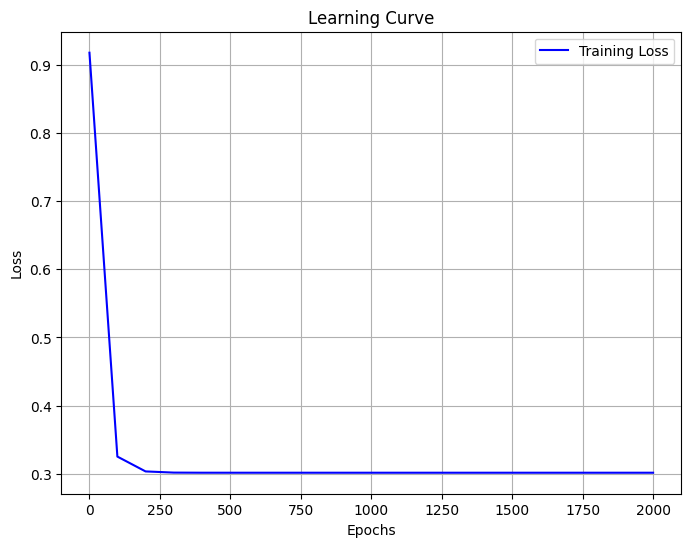

In [14]:
draw_epochs_losses(integer_epochs_losses)

# **5 &nbsp;&nbsp;&nbsp; Evaluate Model**

In [15]:
integer_loss = evaluate_model(
    integer_model,
    criterion=MSELoss(),
    test_data=X_integer_test,
    test_target=y_integer_test
)

print("Model loss:", integer_loss.item())

Model loss: 0.28847694396972656


In [16]:
print("Model weights:", integer_model.weight)
print("Model bias:", integer_model.bias)

Model weights: Parameter containing:
tensor([[0.1427, 0.7660]], requires_grad=True)
Model bias: Parameter containing:
tensor([-6.6998e-06], requires_grad=True)


# **6 &nbsp;&nbsp;&nbsp; Write to File**

In [ ]:
torch.save(integer_model.state_dict(), "../Data/Output/IntegerEncodingFeatureModel/integer_encoding_feature_model.pth")